In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

%matplotlib inline

# List of colors
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [3]:
import warnings
warnings.filterwarnings("ignore")

# ENTITIES

In [4]:
df = pd.read_csv('entities.csv')

In [5]:
df.head()


,uuid,class_id,full_text,entity_text,entity_start,entity_end
0,azI2BNf2ABjwNO3P4BJTBxziN3te-lease_contract_51,lessor,"Leaser: Tianjin Milk Goat Dairy Co., Ltd.","Tianjin Milk Goat Dairy Co., Ltd.",8,41
1,azI2BNf2ABjwNO3P4BJTBxziN3te-lease_contract_51,lessee,"Lessee: Tianjin Yayi Industrial Co., Ltd.","Tianjin Yayi Industrial Co., Ltd.",8,41
2,azI2BNf2ABjwNO3P4BJTBxziN3te-lease_contract_51,clause_number,1.,1.,0,2
3,azI2BNf2ABjwNO3P4BJTBxziN3te-lease_contract_51,clause_title,The premises to be leased,The premises to be leased,0,25
4,azI2BNf2ABjwNO3P4BJTBxziN3te-lease_contract_51,clause_number,2.,2.,0,2


In [6]:
len(df)

15281

In [7]:
df['class_id'] = df['class_id'].apply(lambda x: ' '.join(x.split('_')))

In [8]:
structure = ['sub clause number', 'clause number', 'clause title', 'sub clause title', 'definition', 'definition number', 'annex']
inconsistent = ['indexation rent', 'annex', 'type lease']
leave_apart = ['redflag']

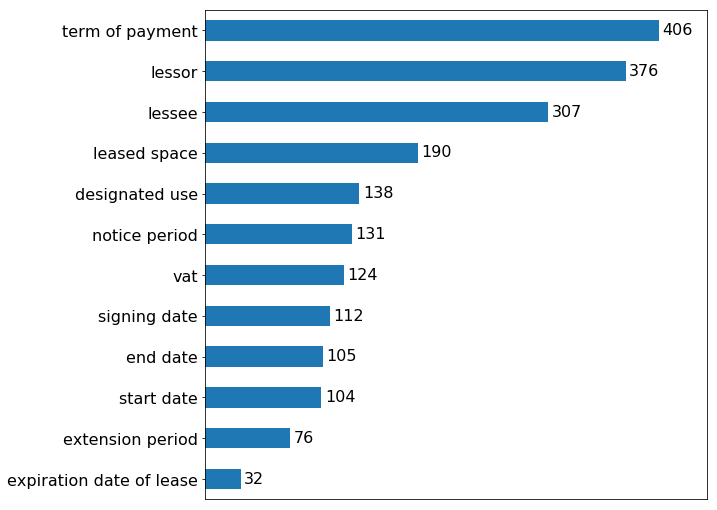

In [9]:
# Number of occurences of entity types - removing inconsistent and structure entities
plt.figure()
dfg = df[~df['class_id'].isin(structure + inconsistent + leave_apart)]['class_id'].value_counts(ascending=True)
ax = dfg.plot.barh(figsize=(9,9))
ax.set_xlim((0, 449))
ax.set_xticks([])
ax.tick_params(axis='both', labelsize=16)
for i, v in enumerate(dfg):
    ax.text(v + 3, i-0.1, str(v), color='black', fontsize=16)
    
plt.savefig('entities_count.pdf', bbox_inches = "tight")

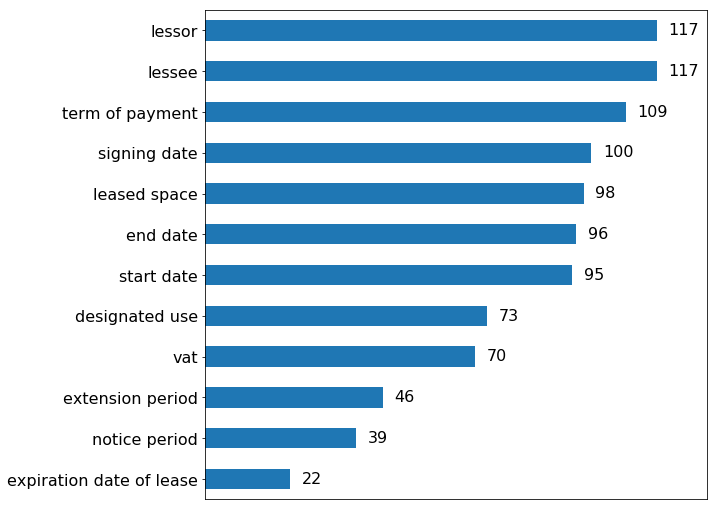

In [10]:
# Number of documents that contain a type of entity
dfg = df[~df['class_id'].isin(structure + inconsistent + leave_apart)][['class_id', 'uuid']].groupby('class_id')['uuid'].nunique().sort_values()
ax = dfg.plot.barh(figsize=(9,9))
_ = ax.set_ylabel('')
ax.set_xlim((0, 130))
ax.set_xticks([])
ax.tick_params(axis='both', labelsize=16)
for i, v in enumerate(dfg):
    ax.text(v + 3, i-0.1, str(v), color='black', fontsize=16)
    
plt.savefig('entities_docs.pdf', bbox_inches = "tight")

In [35]:
df['ent_len'] = df['entity_end'] - df['entity_start']
df['txt_len'] = df['full_text'].apply(lambda x: len(x))
df['ent_txt_ratio'] = df['ent_len'] / df['txt_len']
df['txt_len_cat'] = df['txt_len'].apply(lambda x: 0 if x < 5 else 1 if x < 100 else 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff654a93c50>]],
      dtype=object)

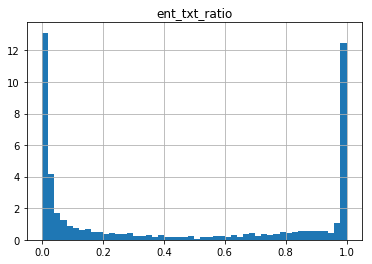

In [36]:
df.hist(column='ent_txt_ratio', bins=50, density=True)

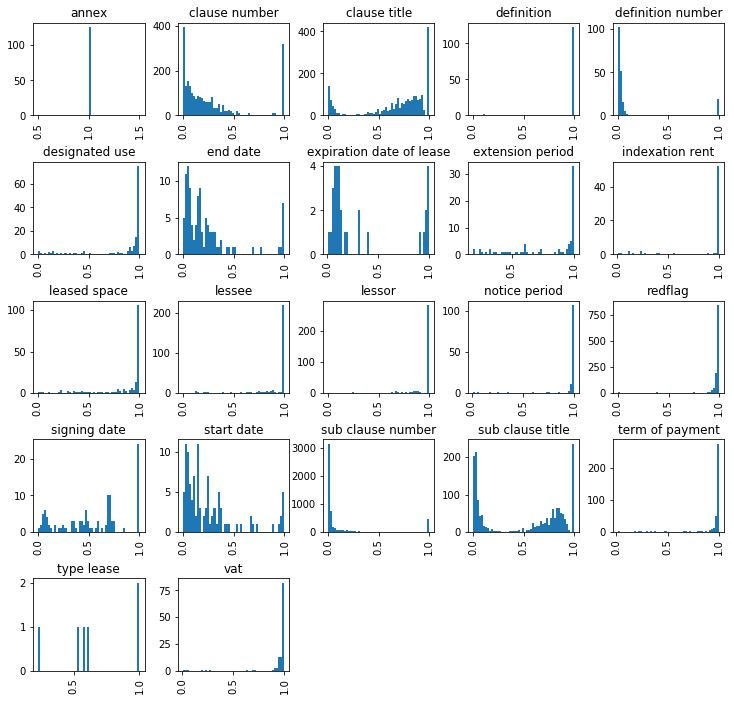

In [40]:
_ = df.hist(column='ent_txt_ratio', by='class_id', bins=50, figsize=(12,12))

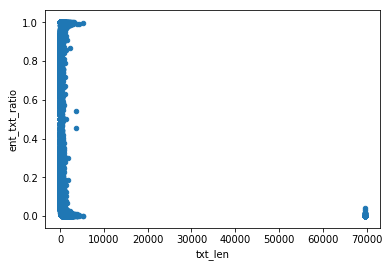

In [43]:
_ = df.plot.scatter(x='txt_len', y='ent_txt_ratio')


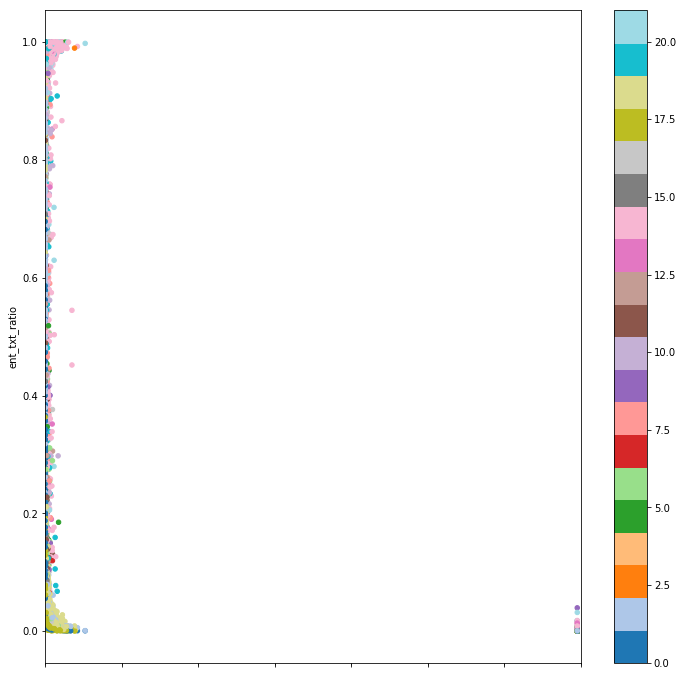

In [53]:
_ = df.plot.scatter(x='txt_len', y='ent_txt_ratio', xlim=(0, 70000), figsize=(12, 12), cmap='tab20', c=df['class_id'].astype('category').cat.codes)

# DOCUMENT CLASSIFICATION

In [11]:
dc = pd.read_csv('docclass.csv')

In [12]:
dc.head()

,uuid,document_full_text,document_class
0,a7rmOv9KIRi17lhunO74q9TDcEwa-lease_792,Exhibit 10.4\nWIDMER BROTHERS BREWING COMPANY ...,amendment
1,azI2BNf2ABjwNO3P4BJTBxziN3te-lease_contract_51,Lease Contract of Premises\nLeaser: Tianjin Mi...,lease agreement
2,arKGDil.M43Ox8dNVXtgDzQkXLUu-lease_contract_30,EXHIBIT 10.20\nShenzhen (South) 0039999\nContr...,lease agreement
3,abArHg68CN_4Om_IY3JyE6nRAGEa-lease_561,Exhibit 10.1\nConfidential Treatment Requested...,lease agreement
4,abXlB0s0XhWsdGC0nEbuzu9n7cbm-lease_983,Exhibit 10.39\nAIR COMMERCIAL REAL ESTATE ASSO...,lease agreement


In [13]:
len(dc)

171

# REDFLAGS

In [14]:
rf = pd.read_csv('redflags.csv')

In [15]:
len(rf)

52853

In [16]:
rf.columns

Index(['uuid', 'text', 'type', 'raw_text', 'start', 'end'], dtype='object')

In [17]:
rf['type'] = rf['type'].apply(lambda x: ' '.join(x.split('_')))

In [18]:
rf['type'].value_counts(ascending=False)

none                                       51990
services charges                             145
sublease permitted                           118
break option                                 114
reinstatement clause                         110
landlord repairs                              84
damage                                        68
guarantee transferable                        56
change of control                             47
right of first refusal to lease               39
right of first refusal to purchase            26
warrantees of the owner                       21
compalsory reconstraction                     10
expansion                                      8
special stipulations                           6
extension period                               5
additional remarks                             3
no obligation to operate                       1
assignment indeplaatsstelling permitted        1
riders                                         1
Name: type, dtype: i

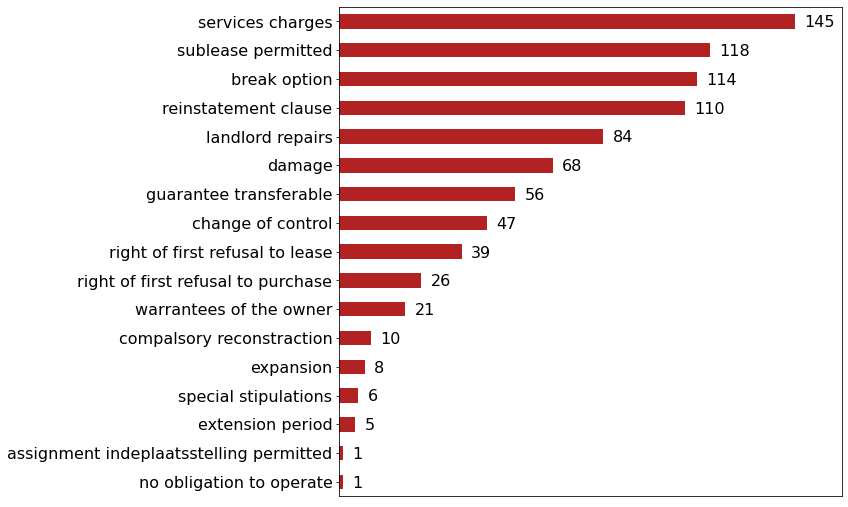

In [19]:
# Number of occurences of each type of redflag
rfg = rf[~rf['type'].isin(['none', 'riders', 'additional remarks'])]['type'].value_counts(ascending=True)
ax = rfg.plot.barh(figsize=(9,9), color='firebrick')

ax.set_xlim((0, 160))
ax.set_xticks([])
ax.tick_params(axis='both', labelsize=16)
for i, v in enumerate(rfg):
    ax.text(v + 3, i-0.2, str(v), color='black', fontsize=16)
    
plt.savefig('redflags_count.pdf', bbox_inches = "tight")

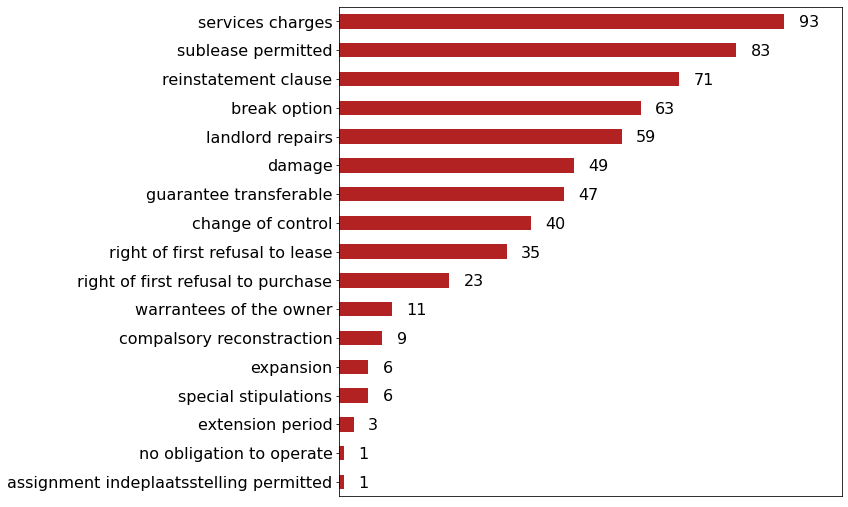

In [20]:
# Number of documents that contain a type of redflag
rfg = rf[~rf['type'].isin(['none', 'riders', 'additional remarks'])][['type', 'uuid']].groupby('type')['uuid'].nunique().sort_values()

ax = rfg.plot.barh(figsize=(9,9), color='firebrick')
ax.set_xlim((0, 105))
ax.set_xticks([])
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=16)
for i, v in enumerate(rfg):
    ax.text(v + 3, i-0.2, str(v), color='black', fontsize=16)
    
plt.savefig('redflags_docs.pdf', bbox_inches = "tight")

# CLAUSE DETECTION

In [21]:
cl_df = pd.read_csv('clauses.csv')
cl_df['count'] = 1

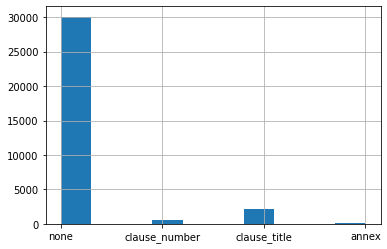

In [22]:
_ = cl_df['clause_type'].hist()

In [23]:
cl_df.groupby(['uuid', 'clause_type']).count().reset_index()[['uuid', 'clause_type', 'count']]

,uuid,clause_type,count
0,a.1kButNZQjWunDCwztKExV.Cwsu-lease_contract_100,clause_number,28
1,a.1kButNZQjWunDCwztKExV.Cwsu-lease_contract_100,none,95
2,a.7gwt0jast7_yYkZGNMh7zbFZZ8-lease_contract_84,clause_number,2
3,a.7gwt0jast7_yYkZGNMh7zbFZZ8-lease_contract_84,clause_title,8
4,a.7gwt0jast7_yYkZGNMh7zbFZZ8-lease_contract_84,none,67
...,...,...,...
304,azVMqwVBF_D9jfBlqAg989G2P4F4-lease_contract_166,clause_number,3
305,azVMqwVBF_D9jfBlqAg989G2P4F4-lease_contract_166,clause_title,8
306,azVMqwVBF_D9jfBlqAg989G2P4F4-lease_contract_166,none,34
307,azWx5wQq9ND6APZRpGis78V.XLrS-lease_contract_152,clause_title,34


In [24]:
# Create a new contract id, for display purpose
uuids = cl_df['uuid'].unique()
uuid_2_nuuid = {u: i for i, u in enumerate(uuids)}
cl_df['nuuid'] = cl_df['uuid'].map(uuid_2_nuuid)

In [25]:
p = cl_df.pivot_table(values=['count'], index='nuuid', columns='clause_type', aggfunc='count').fillna(0.0)


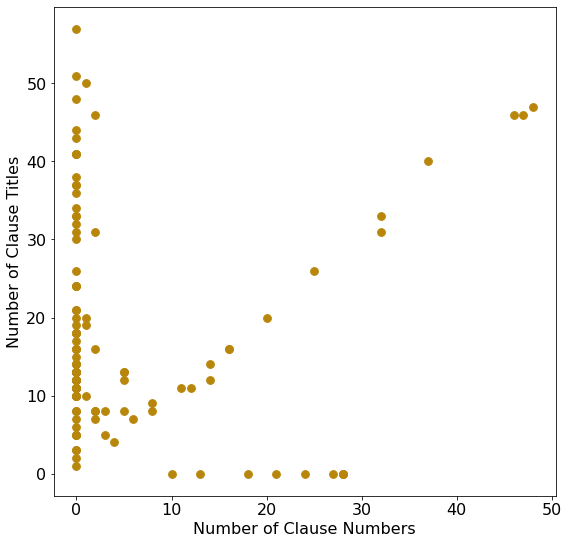

In [26]:
fig = plt.figure(figsize=(9,9))
#plt.scatter(p['count']['clause_number'], p['count']['clause_title'])
plt.scatter(x='clause_number', y='clause_title', data=p['count'], color='darkgoldenrod', s=60)
plt.tick_params(axis='both', labelsize=16)
plt.ylabel('Number of Clause Titles', fontsize=16)
plt.xlabel('Number of Clause Numbers', fontsize=16)

plt.savefig('clause_scatter.pdf', bbox_inches = "tight")

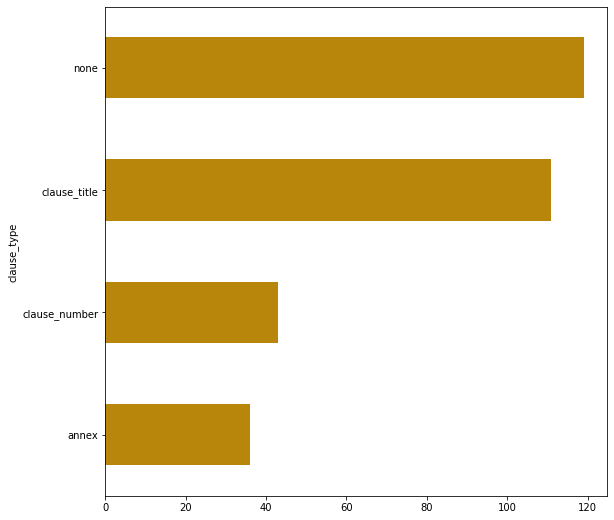

In [27]:
# Number of documents that contain a type of redflag
_ = cl_df[['clause_type', 'uuid']].groupby('clause_type')['uuid'].nunique().sort_values().plot.barh(figsize=(9,9), color='darkgoldenrod')

In [28]:
tps = cl_df.pivot_table(values=['count'], index='nuuid', columns='clause_type', aggfunc='count', margins=True)
tps = tps.fillna(0.0)
for c, ct in tps.columns:
    tps.loc[:, (c, ct)] /= tps.loc[:, ('count', 'All')]
tps = tps.reindex(tps[('count', 'none')].sort_values().index)
tps = tps.drop(columns=[('count', 'All')])

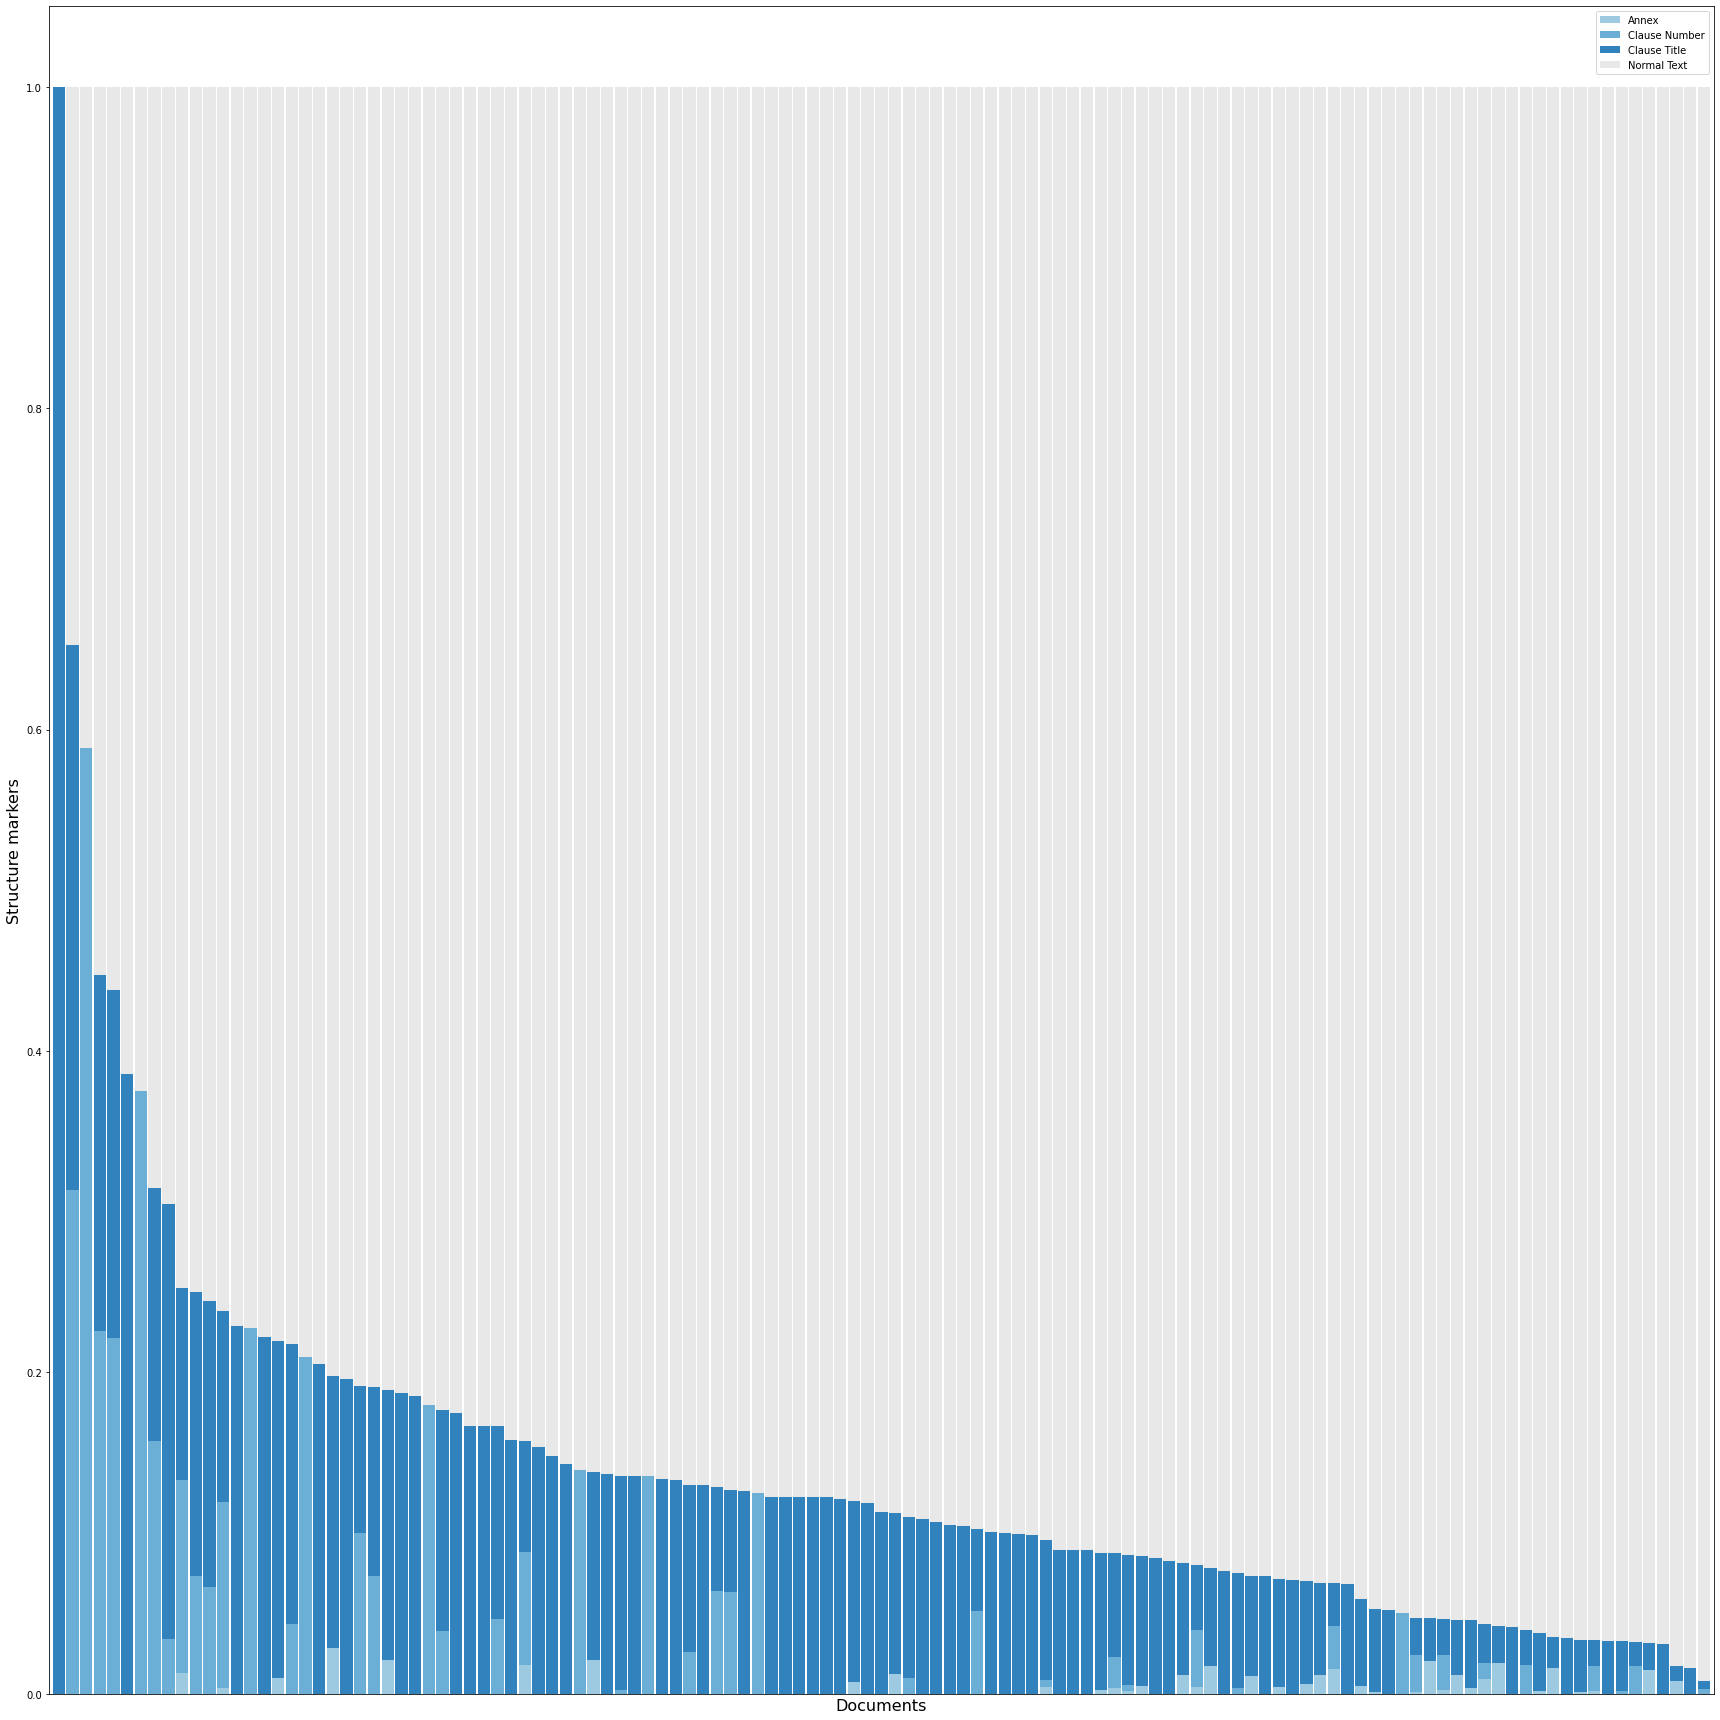

In [29]:
import matplotlib

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 24), sharex=True)

tab20c = matplotlib.cm.get_cmap('tab20c')
_ = tps.plot(kind='bar', stacked=True, ax=ax, color=[tab20c(2), tab20c(1), tab20c(0), matplotlib.colors.to_rgba(tab20c(19), alpha=0.6)], width=0.90)

ax.set_ylabel('Structure markers', fontsize=16)
ax.set_xlabel('Documents', fontsize=16)
ax.set_xticks([])
fig.tight_layout()
plt.legend(labels=['Annex', 'Clause Number', 'Clause Title', 'Normal Text'])

#plt.savefig('viz_easy_redflags.svg', format='svg')


# Easy Redflags
Each part of each contract is binary Redflag or not


In [30]:
df = pd.read_csv('easy_redflag.csv')
df['binary'] = df['type'].map(lambda x: 0 if x == 'none' else 1)
df['count'] = 1

In [31]:
# Create a new contract id, for display purpose
uuids = df['uuid'].unique()
uuid_2_nuuid = {u: i for i, u in enumerate(uuids)}
df['nuuid'] = df['uuid'].map(uuid_2_nuuid)

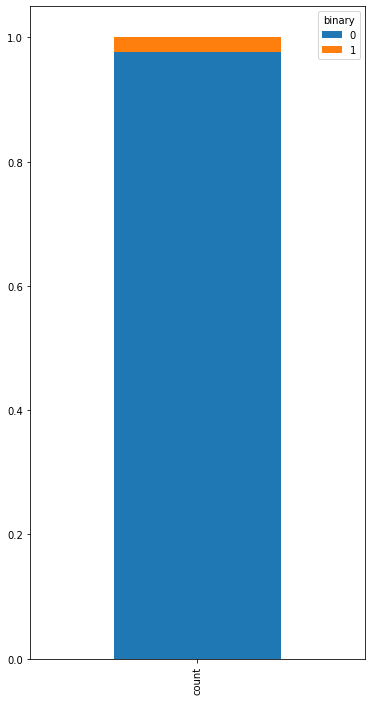

In [32]:
tps = df.pivot_table(values=['count'], index=None, columns='binary', aggfunc='sum')
tps = tps.div(tps.sum(1), axis=0)
_ = tps.plot(kind='bar', stacked=True, figsize=(6,12))

In [33]:
tps = df.pivot_table(values=['count'], index='nuuid', columns='binary', aggfunc='sum')
tps = tps.fillna(0.0)
tps = tps.div(tps.sum(1), axis=0)
tps = tps.reindex(tps['count'].sort_values(by=1).index)


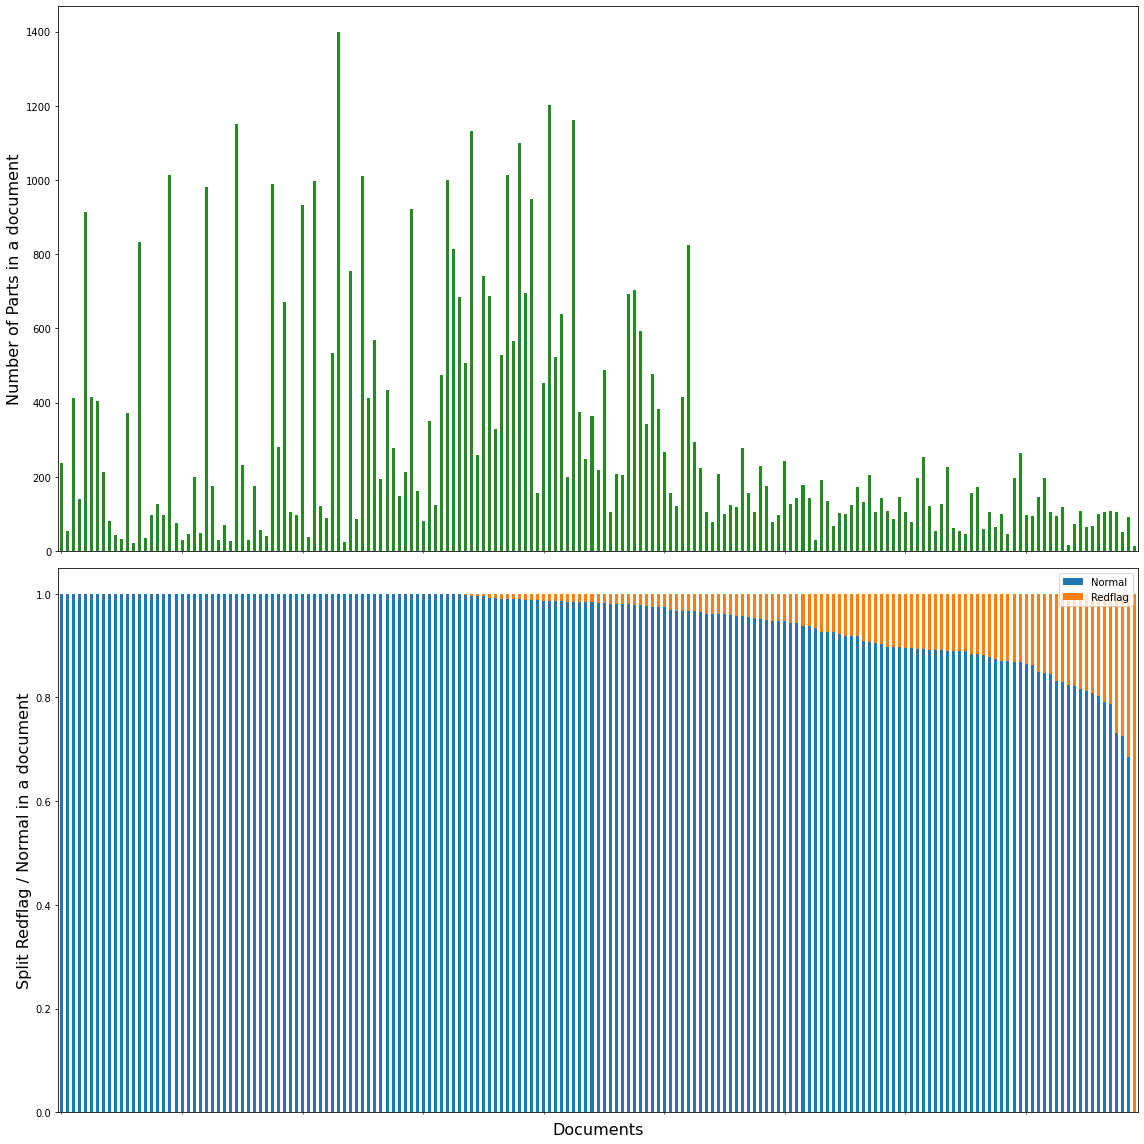

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 16), sharex=True)

_ = df['nuuid'].value_counts().reindex(tps.index).plot(kind='bar', color='forestgreen', ax=axs[0])
_ = tps.plot(kind='bar', stacked=True, ax=axs[1])

axs[0].set_ylabel('Number of Parts in a document', fontsize=16)
axs[1].set_ylabel('Split Redflag / Normal in a document', fontsize=16)
axs[1].set_xlabel('Documents', fontsize=16)
axs[1].set_xticks([])
fig.tight_layout()
plt.legend(labels=['Normal', 'Redflag'])

plt.savefig('viz_easy_redflags.svg', format='svg')
